<h3 style="text-align: center;"><b>Implementing Simple Linear Regression From Scratch (No Optimizations)</b> </h3>
<h5 style="text-align: center;"> This notebook is adapted and adds onto this wonderful tutorial by Jason Brownlee found here:
<br><a href="https://machinelearningmastery.com/implement-simple-linear-regression-scratch-python/" target="_blank">https://machinelearningmastery.com/implement-simple-linear-regression-scratch-python/</a></h5>

<h5 style="text-align: center;"> <a href="https://en.wikipedia.org/wiki/Simple_linear_regression" target="_blank">https://en.wikipedia.org/wiki/Simple_linear_regression</a></h5>
<h5 style="text-align: center;">Linear regression assumes a linear or straight line relationship between the input variables (X) and the single output variable (y). </h5>

<h5 style="text-align: center;"><code>y = &alpha; x + &beta; </code></h5>
<h5 style="text-align: center;"> &alpha; and &beta; are estimated from the training data </h5>
<h5 style="text-align: center;"> We can estimate the coefficients as follows: </h5>
$$ \hat \alpha = \bar{y} - \hat \beta \bar{x} $$
<h5 style="text-align: center;"> In code: <code>&alpha; = mean(y) - &beta; mean(x) </code></h5>
$$ \hat \beta = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2} $$
<h5 style="text-align: center;"> In code: <code>&beta; = sum((x(i) - mean(x)) * (y(i) - mean(y))) / sum( (x(i) - mean(x))^2 ) </code></h5>
<h5 style="text-align: center;"> Where the i refers to the value of the ith value of the input x or output y. </h5>

(63,) (63,)


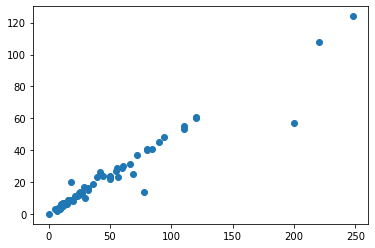

In [3]:
import pandas
import matplotlib.pyplot as plt

data = pandas.read_csv("Data\\linear_data.csv")
data_X = data['X'].to_numpy()
data_Y = data['Y'].to_numpy()
print(data_X.shape, data_Y.shape)
plt.scatter(data_Y, data_X)
plt.show()

<h4 style="text-align: center;"> 1. Calculate Mean and Variance </h4>

$$ \text{Mean: } \bar{X} = \frac{\sum_{i=1}^{n} x_i}{n} $$
<h5 style="text-align: center;"> n is number of terms </h5>
<h5 style="text-align: center;"> In code: <code>mean(x) = sum(x) / count(x) </code></h5>
<h5 style="text-align: center;"><a href="https://en.wikipedia.org/wiki/Mean" target="_blank">https://en.wikipedia.org/wiki/Mean</a></h5>
$$ \text{Variance: } \sigma^2 = \sum_{i=1}^{n} (x_i - \bar{x})^2 $$
<h5 style="text-align: center;"> In code: <code>&sigma; = sum(x - mean(x))**2)</code></h5>
<h5 style="text-align: center;">Variance measures how far a set of numbers are spread out from their average value.</h5>
<h5 style="text-align: center;"><a href="https://en.wikipedia.org/wiki/Variance" target="_blank">https://en.wikipedia.org/wiki/Variance</a></h5>

In [4]:
"""
1. Mean and Variance
"""
from math import pow, sqrt
def _mean(values):
    """
    Input 1d array (values) -> Output a scalar value, the mean
    """
    return (sum(values) / float(len(values)))

def _variance(values, mean):
    """
    Input 1d array (values) and scalar value (mean) -> Output scalar value, the variance
    """
    var = []
    for x in values:
        var.append(pow((x - mean), 2))
    return sum(var)

mean_x = _mean(data_X)
mean_y = _mean(data_Y)
print("Mean of inputs:", mean_x, "Mean of outputs:", mean_y)
print("Variance of inputs:", _variance(data_X, mean_x), "Variance of outputs:", _variance(data_Y, mean_y))

Mean of inputs: 22.904761904761905 Mean of outputs: 48.35079365079365
Variance of inputs: 33809.42857142858 Variance of outputs: 156445.4174603175


<h4 style="text-align: center;"> 2. Calculate Covariance </h4>
<h5 style="text-align: center;">The covariance of two groups of numbers describes how those numbers change together.</h5>
<h5 style="text-align: center;">Covariance is a generalization of correlation. Correlation describes the relationship between two groups of numbers, whereas covariance can describe the relationship between two or more groups of numbers.</h5>
<h5 style="text-align: center;">Additionally, covariance can be normalized to produce a correlation value.</h5>
$$ \text{cov =} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y}) $$
<h5 style="text-align: center;">In code: <code>cov = sum((x(i) - mean(x)) * (y(i) - mean(y)))</code></h5>
<h5 style="text-align: center;"><a href="https://en.wikipedia.org/wiki/Covariance" target="_blank">https://en.wikipedia.org/wiki/Covariance</a><h5>

In [5]:
"""
2. Covariance
"""
def _covariance(x, mean_x, y, mean_y):
    """
    Input 1d array (x), Input 1d array (y), a scalar the mean of the x's (mean_x) and the mean of the y's (mean_y) -> a scalar the covariance
    """
    cov = 0
    for i in range(len(x)):
        cov += (x[i] - mean_x) * (y[i] - mean_y)
    return cov
covar = _covariance(data_X, mean_x, data_Y, mean_y)
print("Covariance:", covar)

Covariance: 70191.20476190475


<h4 style="text-align: center;"> 3. Calculate Coefficients, RMSE, and R^2 </h4><br>
<h5 style="text-align: center;"> Coefficients </h5><br>
$$ \hat \beta = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2} $$
<h5 style="text-align: center;"> In code: <code>&beta; = sum((x(i) - mean(x)) * (y(i) - mean(y))) / sum( (x(i) - mean(x))^2 )</code></h5><br>
$$ \hat \beta \text{=} \frac{covariance(x, y)}{variance(x)} $$
<h5 style="text-align: center;"> In code: <code>&beta; = covariance(x, y) / variance(x)</code></h5><br>
$$ \hat \alpha \text{ = } \bar{y} - \hat \beta \bar{x} $$
<h5 style="text-align: center;">In code: <code>&alpha; = mean(y) - &beta; * mean(x)</code></h5>
<h5 style="text-align: center;"> RMSE </h5><br>
$$ \text{rmse} = \sqrt{\frac{\sum_{i=1}^{n} (\hat{y_i} - y_i)^2}{n}} $$ 
<h5 style="text-align: center;"> In code: <code> rmse = sqrt(sum((y_pred - y_actual)**2)/n) </code></h5>
<h5 style="text-align: center;"><a href="https://en.wikipedia.org/wiki/Root-mean-square_deviation" target="_blank">https://en.wikipedia.org/wiki/Root-mean-square_deviation</a></h5><br>
$$ R^2 $$
<h5 style="text-align: center;"> The coefficient of determination, denoted R2 or r2 and pronounced "R squared", is the proportion of the variance in the dependent variable that is predictable from the independent variable(s). </h5>
$$ R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y_i})^2}{\sum_{i=1}^{n} (y_i - \bar{y_i})^2} $$
$$ \text{The numerator is the variance and the denomenator the } y_i \text{ is the } i^{th} \text{ value of the variable to be predicted and } \hat{y_i} \text{ is the predicted value.} $$
<h5 style="text-align: center;">In code: <code>1 - (sum((y - mean(y))**2)) / (sum((x - y_pred))**2)

In [6]:
"""
3. Coefficients, RMSE and Evaluation
"""
def _coefficients(X, Y):
    """
    Input 1d array (X) and 1d array (Y) -> Output alpha and beta scalar coefficients
    """
    x_mean, y_mean = _mean(X), _mean(Y)
    beta = _covariance(X, x_mean, Y, y_mean) / _variance(X, x_mean)
    alpha = y_mean - beta * x_mean
    return alpha, beta
alpha, beta = _coefficients(data_X, data_Y)
print("Alpha:", alpha, "Beta:",beta)

def _rmse(actual, predicted):
    """
    Input 1d array (actual) and 1d array (predicted) -> Output scalar rmse error
    """
    sum_error = 0.0
    for i in range(len(actual)):
        sum_error += pow(predicted[i] - actual[i], 2)
    return sqrt((sum_error / float(len(actual))))

def _r_squared(X, Y, predictions):
    """
    Input 1d array (X) and 1d array (Y) and 1d array (predictions) -> Output scalar R^2
    """
    var = _variance(Y, _mean(Y))
    denomenator = 0.0
    predictions = []
    for i in range(len(data_X)):
        predictions.append(predict(data_X, data_Y, data_X[i]))
    for i in range(len(X)):
        denomenator += pow((X[i] - predictions[i]), 2)
    r_square = 1 - (var / denomenator)
    return r_square

Alpha: 0.798589996028177 Beta: 2.076083735447141


<h4 style="text-align: center;"> 4. Calculate Coefficients </h4>
<h5 style="text-align: center;"><code>y = &alpha; x + &beta; </code></h5>

In [7]:
"""
4. Predict
"""
def _predict(X, Y, pred):
    """
    Input 1d array (train) and 1d array (test)
    """
    beta, alpha = _coefficients(X, Y)
    y_hat = beta + alpha * pred
    return y_hat

<h5 style="text-align: center;">Putting this all together with inspiration from <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html" target="_blank">Sklearn Linear Regression</a></h5>

In [8]:
from math import pow, sqrt
class LinearRegressionUtils:
    def mean(self, values):
        """
        Input 1d array (values) -> Output a scalar value, the mean
        """
        return (sum(values) / float(len(values)))

    def variance(self, values, mean):
        """
        Input 1d array (values) and scalar value (mean) -> Output scalar value, the variance
        """
        var = []
        for x in values:
            var.append(pow((x - mean), 2))
        return sum(var)
    
    def covariance(self, x, mean_x, y, mean_y):
        """
        Input 1d array (x), Input 1d array (y), a scalar the mean of the x's (mean_x) and the mean of the y's (mean_y) -> a scalar the covariance
        """
        cov = 0
        for i in range(len(x)):
            cov += (x[i] - mean_x) * (y[i] - mean_y)
        return cov
    
    def coefficients(self, X, Y):
        """
        Input 1d array (X) and 1d array (Y) -> Output alpha and beta scalar coefficients
        """
        x_mean, y_mean = self.mean(X), self.mean(Y)
        beta = self.covariance(X, x_mean, Y, y_mean) / self.variance(X, x_mean)
        alpha = y_mean - beta * x_mean
        return alpha, beta
    
    def rmse(self, actual, predicted):
        """
        Input 1d array (actual) and 1d array (predicted) -> Output scalar rmse error
        """
        sum_error = 0.0
        for i in range(len(actual)):
            sum_error += pow(predicted[i] - actual[i], 2)
        return sqrt((sum_error / float(len(actual))))

    def r_squared(self, X, Y, predictions):
        """
        Input 1d array (X) and 1d array (Y) and 1d array (predictions) -> Output scalar R^2
        """
        var = self.variance(Y, self.mean(Y))
        denomenator = 0.0
        for i in range(len(X)):
            denomenator += pow((X[i] - predictions[i]), 2)
        r_square = 1 - (var / denomenator)
        return r_square

class LinearRegression(LinearRegressionUtils):
    """
    Demo Linear Regression Class
    """
    def fit(self, X, Y):
        self.X = X
        self.Y = Y
        self.intercept_, self.coef_ = LinearRegressionUtils.coefficients(self, self.X, self.Y)
        self.train_predicts = []
        for i in range(len(X)):
            self.train_predicts.append(self.predict(X[i]))
        
    def predict(self, x):
        return self.intercept_ + self.coef_*x
    
    def score(self, X=None, Y=None):
        if X == None and Y == None:
            return LinearRegressionUtils.r_squared(self, self.X, self.Y, self.train_predicts)
        else:
            pass # add later
        
    def rmse(self):
        return LinearRegressionUtils.rmse(self.Y, self.train_predicts)

In [9]:
"""
Test
"""
import numpy as np
reg = LinearRegression()
reg.fit(data_X, data_Y)
print("R^2:", reg.score())
print("Alpha:", reg.coef_)
print("Beta:", reg.intercept_)
print("Prediction:", reg.predict(34))
print("\n")
reg2 = LinearRegression()
X = [1, 1, 1, 2, 2, 2, 2, 3]
y = [3, 3, 3, 6, 6, 6, 6, 9]
reg2.fit(X, y)
print("R^2:", reg2.score())
print("Alhpa:", reg2.coef_)
print("Beta:", reg2.intercept_)
print(reg2.predict(np.array([[3, 5]])))

R^2: -0.9569774485515175
Alpha: 2.076083735447141
Beta: 0.798589996028177
Prediction: 71.38543700123097


R^2: 0.71875
Alhpa: 3.0
Beta: 0.0
[[ 9. 15.]]


In [22]:
"""
TODO: as can be seen our code is correct except for R^2 which is off (see issue 1)
"""
from sklearn.linear_model import LinearRegression
X = np.array(X).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)
reg3 = LinearRegression().fit(X, y)
print(reg3.score(X, y))
print(reg3.coef_)
print(reg3.intercept_)
p_3 = np.array(3).reshape(1, -1)
p_5 = np.array(5).reshape(1, -1)
print(reg3.predict(p_3), reg3.predict(p_5))

1.0
[[3.]]
[8.8817842e-16]
[[9.]] [[15.]]
